In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Pokemon1.csv',header=0,index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


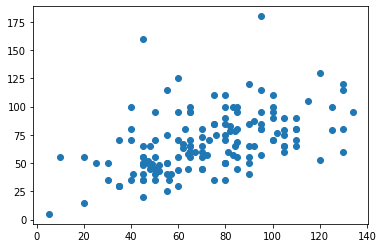

In [8]:
plt.scatter(data=df, x='Attack',y='Defense')
plt.show()

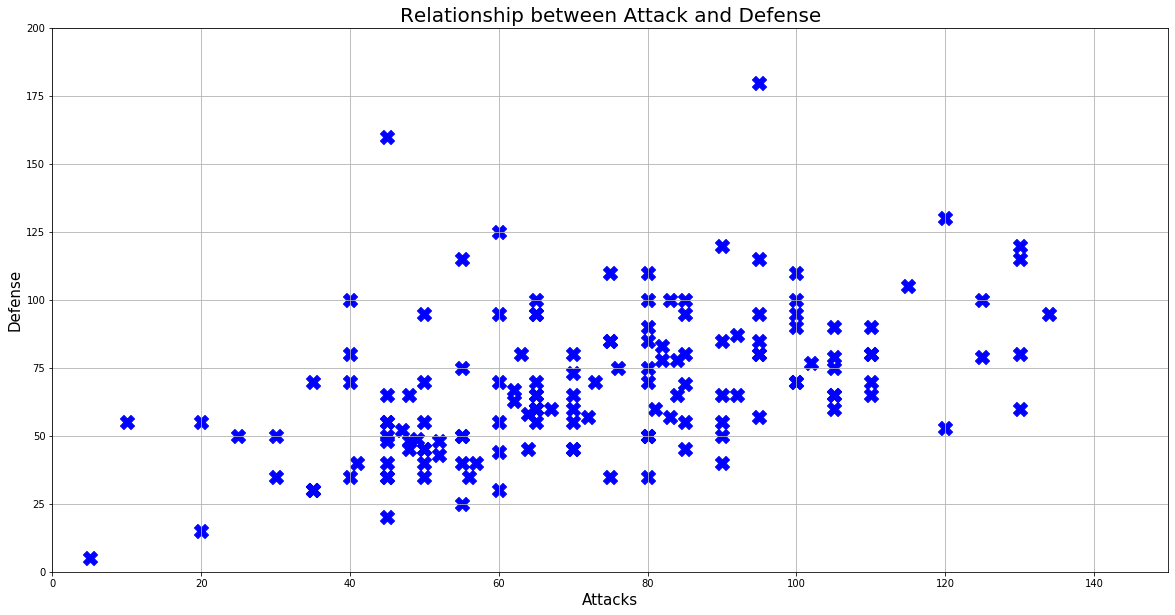

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(data=df, x='Attack',y='Defense',s=200, c='blue',marker='X')
#change axes ranges
plt.xlim(0,150)
plt.ylim(0,200)
#add title
plt.title('Relationship between Attack and Defense',size=20)
#add x and y labels
plt.xlabel('Attacks',size=15)
plt.ylabel('Defense',size=15)
plt.grid(True)
#show plot
plt.savefig("test.jpg")
plt.show()


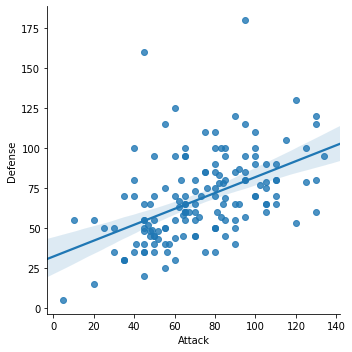

In [20]:
#scatter plot with regression line
sns.lmplot(data=df,x='Attack',y='Defense')

In [21]:
import warnings
warnings.filterwarnings("ignore")

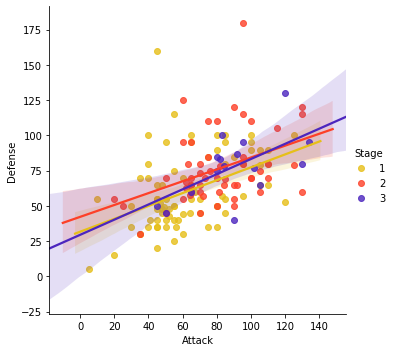

In [34]:
sns.lmplot(data=df,x='Attack', y='Defense',
          fit_reg=True,#NO regression line
          hue='Stage',palette="CMRmap_r") #COLOR BY EVOLUTION STAGE
plt.savefig("test1.jpg")
plt.show()

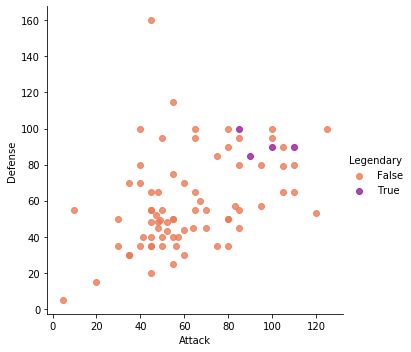

In [38]:
#only for a particular stage
sns.lmplot(data=df.loc[df["Stage"]==1],x='Attack', y='Defense',
          fit_reg=False,#NO regression line
          hue='Legendary',palette="plasma_r") #COLOR BY EVOLUTION STAGE

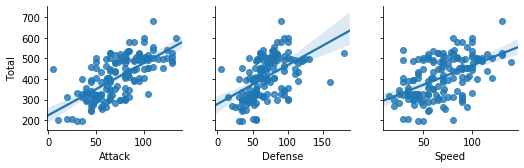

In [41]:
sns.pairplot(df,x_vars=['Attack','Defense','Speed'],y_vars='Total',kind='reg')

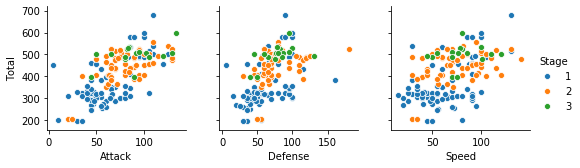

In [42]:
sns.pairplot(df,x_vars=['Attack','Defense','Speed'],y_vars='Total',kind='scatter',hue='Stage')

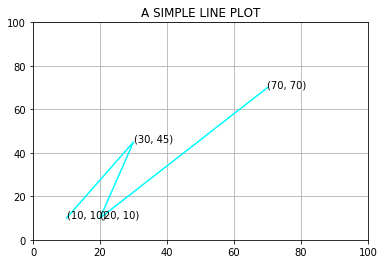

In [47]:
#Line plot
x=[10,30,20,70]
y=[10,45,10,70]
plt.plot(x,y,c="cyan")

plt.xlim(0,100)
plt.ylim(0,100)
plt.title('A SIMPLE LINE PLOT')
plt.grid(True)
for i_x, i_y in zip(x,y):
    plt.text(i_x,i_y,(i_x,i_y))

plt.savefig('test2.jpg')
plt.show()

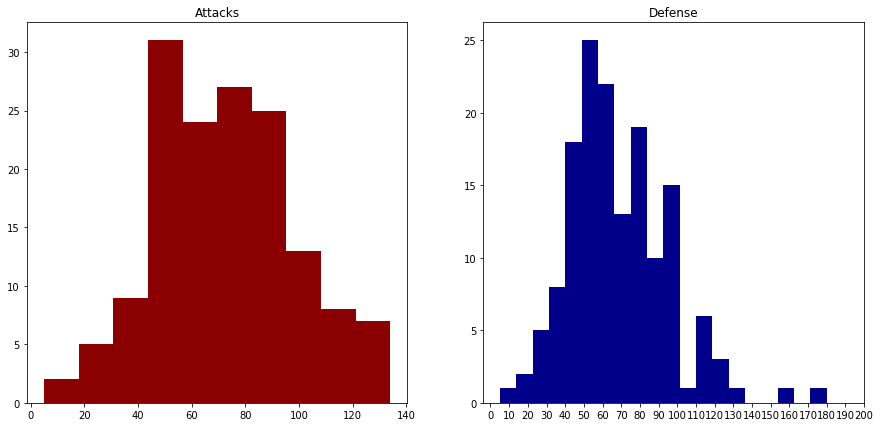

In [51]:
import numpy as np
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(x='Attack',data=df,bins=10,color='darkred')
plt.title('Attacks')
plt.subplot(122)
plt.hist(x='Defense',data=df,bins=20,color='darkblue')
plt.title('Defense')
plt.xticks(np.arange(0,201,10))
plt.show()

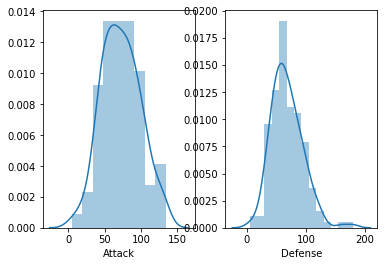

In [58]:
#distribution plot
plt.subplot(121)
sns.distplot(df.Attack)
plt.subplot(122)
sns.distplot(df.Defense)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

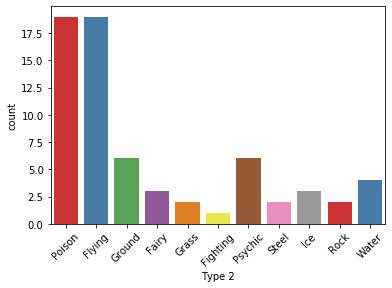

In [59]:
sns.countplot(x='Type 2',data=df,palette='Set1')

#rotate x-labels
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

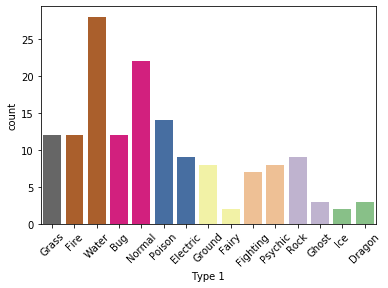

In [61]:
sns.countplot(x='Type 1',data=df,palette='Accent_r')

#rotate x-labels
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

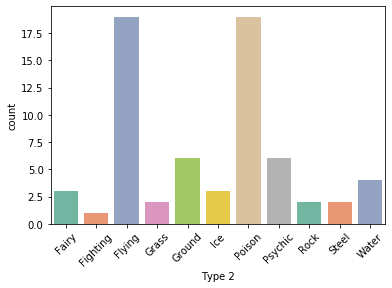

In [64]:
#count plot (aka frequency bar plot)
sns.countplot(x='Type 2',data = df,palette='Set2',
             order=df['Type 2'].value_counts().sort_index().index)
#rotate x-labels
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

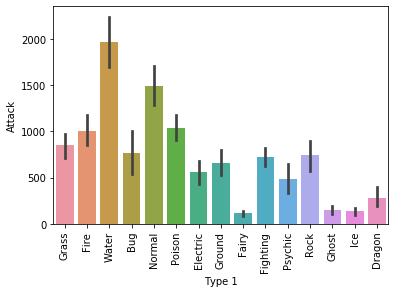

In [65]:
import numpy as np
sns.barplot(x='Type 1',y='Attack',data=df,estimator=np.sum)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

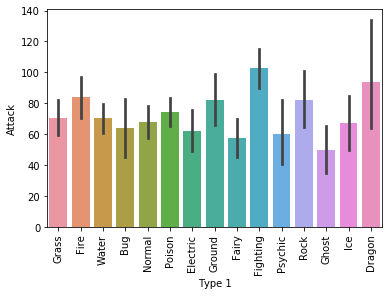

In [67]:
#mean and average can be taken
sns.barplot(x='Type 1',y='Attack',data=df,estimator=np.average)
plt.xticks(rotation=90)

In [68]:
df['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Fire        12
Grass       12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

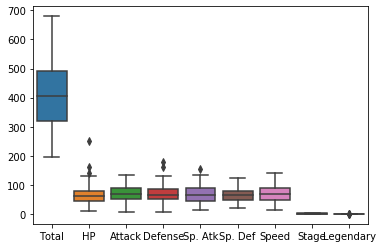

In [71]:
sns.boxplot(data=df)

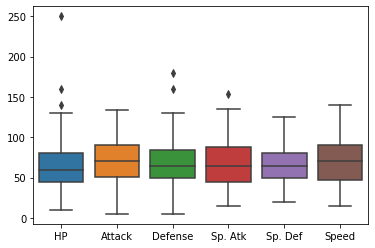

In [73]:
#pre format dataframe
stats_df = df.drop(['Total','Stage','Legendary'], axis=1)

#new boxplot using stats_df
sns.boxplot(data=stats_df)

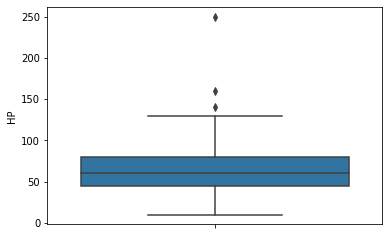

In [75]:
sns.boxplot(y=df.HP)

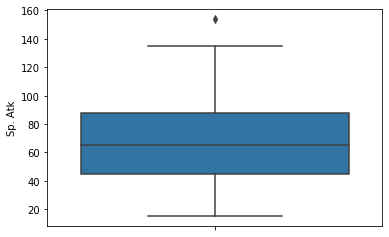

In [76]:
sns.boxplot(y=df["Sp. Atk"])

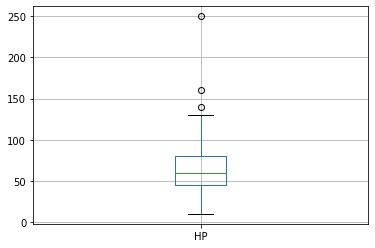

In [84]:
#using pandas boxplot
df.boxplot(column="HP")
plt.show()

In [89]:
import pandas_profiling as pf
import pandas as pd
titanic_df=pd.read_excel("Titanic_Survival_Train (1).xls")

In [90]:
df=pf.ProfileReport(titanic_df)

In [91]:
df

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [92]:
df.to_file("report.html")